# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Bike sharing dataset

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [3]:
#Reading csv data file

bikeshare = pd.read_csv('day.csv')

# Checking first five rows of the dataframe
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Inspecting dataframe

print(bikeshare.shape)

(730, 16)


In [5]:
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking for datatypes
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Removing unnecessary columns from the dataframe which are not going to contribute in building model.

cols_to_be_dropped = ['instant', 'dteday','casual','registered']

bike_share = bikeshare.drop(cols_to_be_dropped, axis =1)

bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Visualising the Data

In [1]:
#Visualising the Data

#Visualising numeric varaibles

sns.pairplot(bike_share,hue = 'cnt',diag_kind='kde')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1440x864 with 0 Axes>

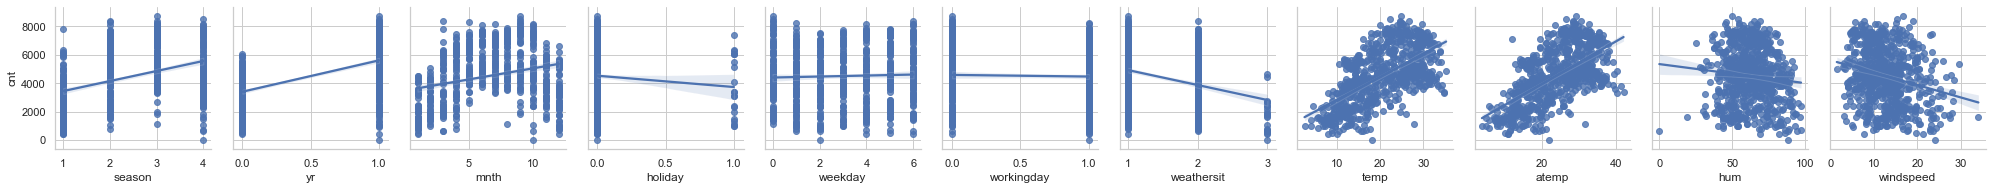

In [8]:
plt.figure(figsize=(20, 12))
feature_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum','windspeed']
# multiple scatter plots in Seaborn
sns.pairplot(bike_share, x_vars=feature_cols, y_vars='cnt', kind='reg')
plt.show()

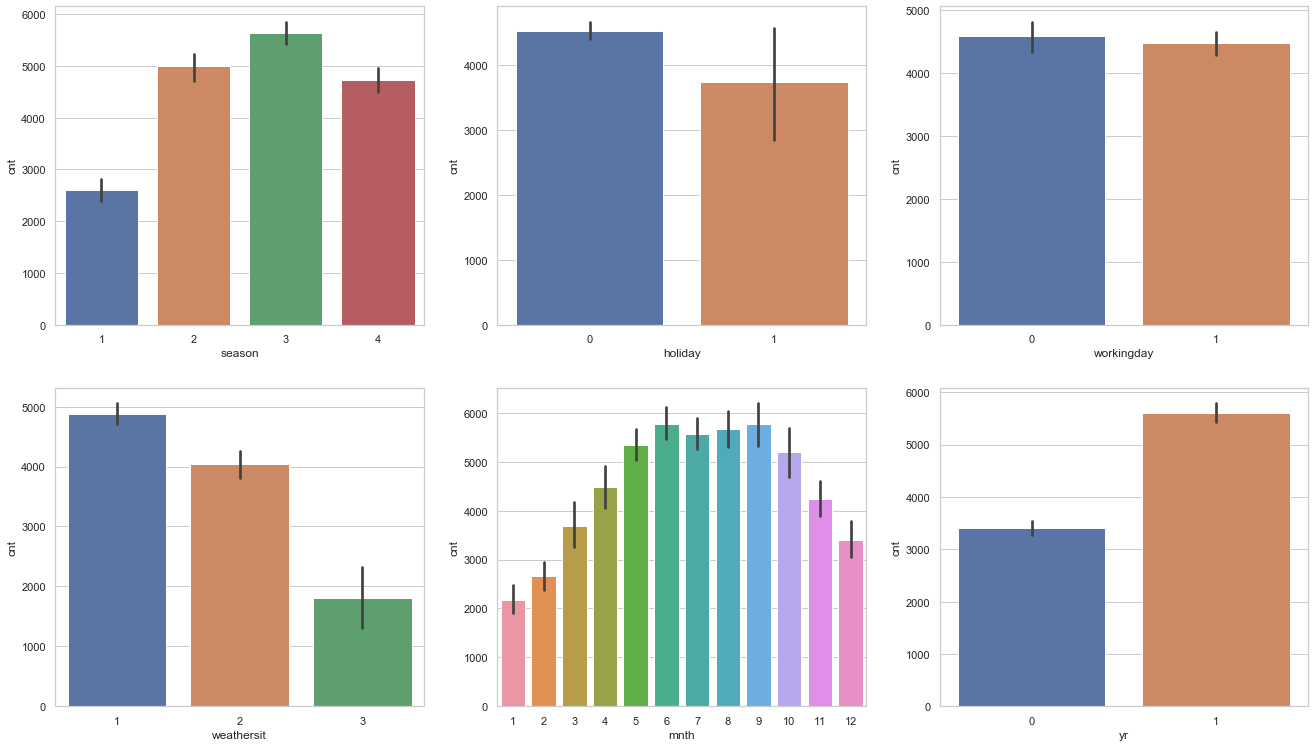

In [9]:
#Here we can observe that 'temp' and 'atemp' are having linear relationship of points with respect to 'cnt'

#Visualising categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'season', y = 'cnt', data = bike_share)
plt.subplot(2,3,2)
sns.barplot(x = 'holiday', y = 'cnt', data = bike_share)
plt.subplot(2,3,3)
sns.barplot(x = 'workingday', y = 'cnt', data = bike_share)
plt.subplot(2,3,4)
sns.barplot(x = 'weathersit', y = 'cnt', data = bike_share)
plt.subplot(2,3,5)
sns.barplot(x = 'mnth', y = 'cnt', data = bike_share)
plt.subplot(2,3,6)
sns.barplot(x = 'yr', y = 'cnt', data = bike_share)
plt.show()
plt.show()



1. By the categorical variables, we can infer that the count distribution in the year 2019 is better than the year 2018 with the highest count of 8714.
2. Further, we can infer that bikes are least rented in spring and increase in summer. After summer, there is a sudden increase in bike renting during the fall with a slight decline in rents during winter. 
3. Ridership is based on weather as well. When the weather is clear, the number of ridership is high. There is a slight decline in rents during mist + cloudy weather following with light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds weather. And there is not a single rent placed during heavy Rain + Ice Pallets + thunderstorm + mist, snow + fog weather. 
4. More we can say that the bikes are rented more during working days as compared to holidays. 
5. It can be seen that bike rents are low during January with an increasing graph till June. Then the rent cont average is around 5000 from June to October, and then again there is a decrease in counts till the year-end. 
6. On daily basis, we can observe that the average is around 4200 bike rent counts. We can also visualise some of these categorical features parallelly by using the hue argument.

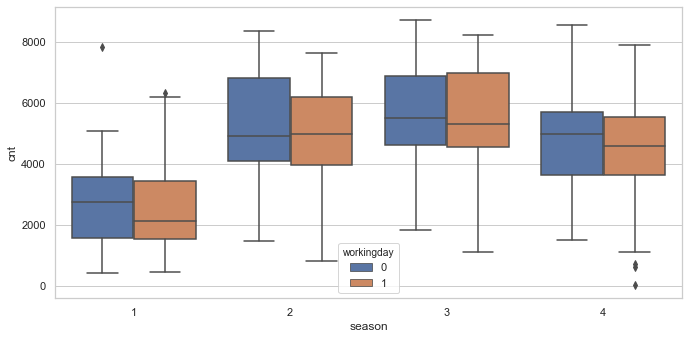

In [10]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bike_share)
plt.show()

1. It can be seen that fall has highest number of users and within that working day has highest users of bike 

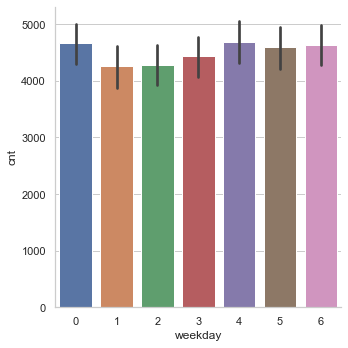

In [11]:
sns.factorplot(x="weekday",y='cnt',kind='bar',data=bike_share,size=5,aspect=1)


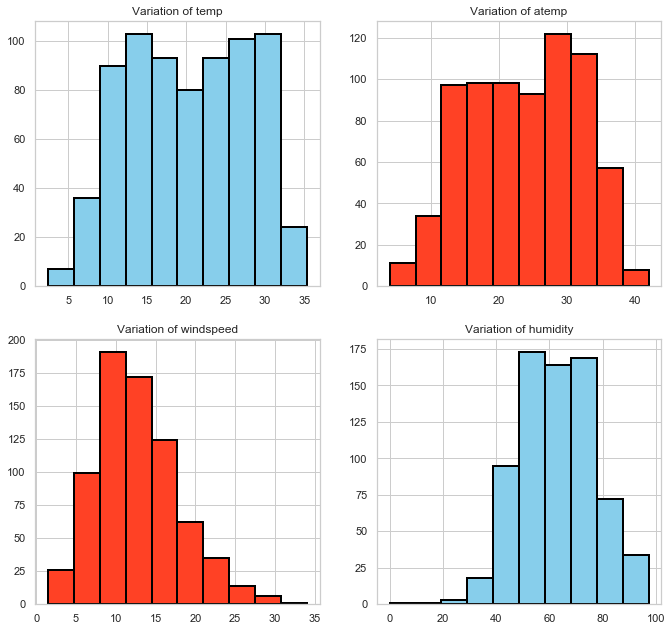

In [12]:
# can also be visulaized using histograms for all the continuous variables.
bike_share.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=bike_share,edgecolor="black",linewidth=2,color='skyblue')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=bike_share,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=bike_share,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="hum",data=bike_share,edgecolor="black",linewidth=2,color='skyblue')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)
                    

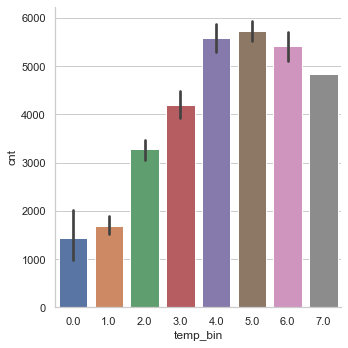

In [13]:
new_df=bike_share.copy()
new_df.temp.describe()
new_df['temp_bin']=np.floor(new_df['temp'])//5
new_df['temp_bin'].unique()
# now we can visualize as follows
sns.factorplot(x="temp_bin",y="cnt",data=new_df,kind='bar')

now the demand is highest for bins 4 and 5 which is about tempearure  20-25(bin 4) and 25-30 (bin 5).

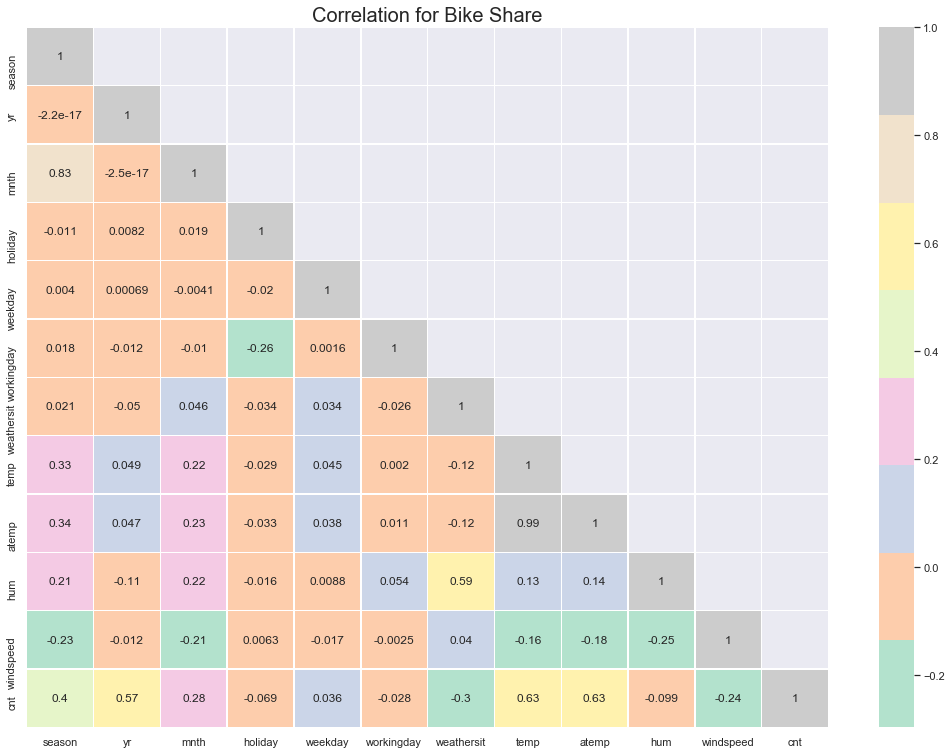

In [14]:
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
cor_mat= bike_share[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(bike_share.corr(), annot = True, cmap ='Pastel2',linewidths=.5,mask=mask)

ax = plt.axes()


ax.set_title('Correlation for Bike Share', fontsize = 20)
plt.show()

######  INFERENCES FROM THE ABOVE HEATMAP--

1. self realtion i.e. of a feature to itself is equal to 1 as expected.

2. temp and atemp are highly related as expected.
 
3. humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

4. also note that holiday and working day are highly inversely related as you would expect.

5. Also note that count and holiday are highly inversely related as you would expect.

6. Also note that temp(or atemp) highly effects the count. 

7. Also note that weather and count are highly inversely related. This is because for our data as weather increases from (1 to 4) implies that  weather is getting more worse and so lesser people will rent bikes.


### Data Preparation

In [15]:
#Data preparation

#Mapping varaibles for season.

bike_share[['season']] = bike_share[['season']].apply(lambda x: x.map({1:'spring',2:'summer', 3:'fall', 4:'winter'}))

bike_share.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
#Mapping varaibles for mnth

bike_share[['mnth']] = bike_share[['mnth']].apply(lambda x: x.map({1:'Januaray',2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November',12:'December'}))

bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Januaray,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Januaray,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Januaray,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Januaray,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Januaray,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
#Mapping varaibles for weekday.

bike_share[['weekday']] = bike_share[['weekday']].apply(lambda x: x.map({0:'Sunday',1:'Monday',2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday' }))

bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Januaray,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Januaray,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Januaray,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Januaray,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Januaray,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
#Mapping varaibles for weekday.

bike_share[['weathersit']] = bike_share[['weathersit']].apply(lambda x: x.map({ 1:'Clear',2:'Mist', 3:'Light Rain ', 4:'Heavy Rain'}))

bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Januaray,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Januaray,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Januaray,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Januaray,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Januaray,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [19]:
#Dummy Variables

# Get the dummy variables for the feature 'season' and store it in a new variable - season

season = pd.get_dummies(bike_share['season'], drop_first=True)

# Check how 'season' looks like
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - mnth

mnth = pd.get_dummies(bike_share['mnth'], drop_first=True)

# Check how 'season' looks like
mnth.head()

,August,December,February,Januaray,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [21]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - weekday

weekday = pd.get_dummies(bike_share['weekday'], drop_first=True)

# Check how 'season' looks like
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [22]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - weathersit

weathersit = pd.get_dummies(bike_share['weathersit'], drop_first=True)

# Check how 'season' looks like
weathersit.head()

,Light Rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [23]:
#concat dunny varaibles with the dataframe


bike_share = pd.concat([season,mnth,weekday,weathersit,bike_share], axis= 1)

bike_share.head()

,spring,summer,winter,August,December,February,Januaray,July,June,March,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Januaray,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Januaray,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Januaray,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Januaray,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Januaray,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
# Drop varaibles for which we have created the dummies for building model


bike_share.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

bike_share

,spring,summer,winter,August,December,February,Januaray,July,June,March,...,Light Rain,Mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,10.420847,11.33210,65.2917,23.458911,2114
726,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,10.386653,12.75230,59.0000,10.416557,3095
727,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,10.386653,12.12000,75.2917,8.333661,1341
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [26]:
bike_share.head()

,spring,summer,winter,August,December,February,Januaray,July,June,March,...,Light Rain,Mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
#Dropping one of 'atemp' and 'temp' 

bike_share.drop(['atemp'], axis = 1, inplace=True)

bike_share.shape


(730, 29)

## Splitting the Data into Training and Testing Sets

In [28]:
#Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike_share, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
df_train.shape

(510, 29)

In [30]:
df_test.shape

(219, 29)

### Rescaling the Features 

We will use MinMax scaling.

In [31]:
#Rescaling the Features

#We will use MinMaxScaler to rescale the variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [32]:
# Apply scaler() to all the columns except the 'Binary' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,spring,summer,winter,August,December,February,Januaray,July,June,March,...,Wednesday,Light Rain,Mist,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973


In [33]:
df_train.describe()

,spring,summer,winter,August,December,February,Januaray,July,June,March,...,Wednesday,Light Rain,Mist,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.135294,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.342373,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


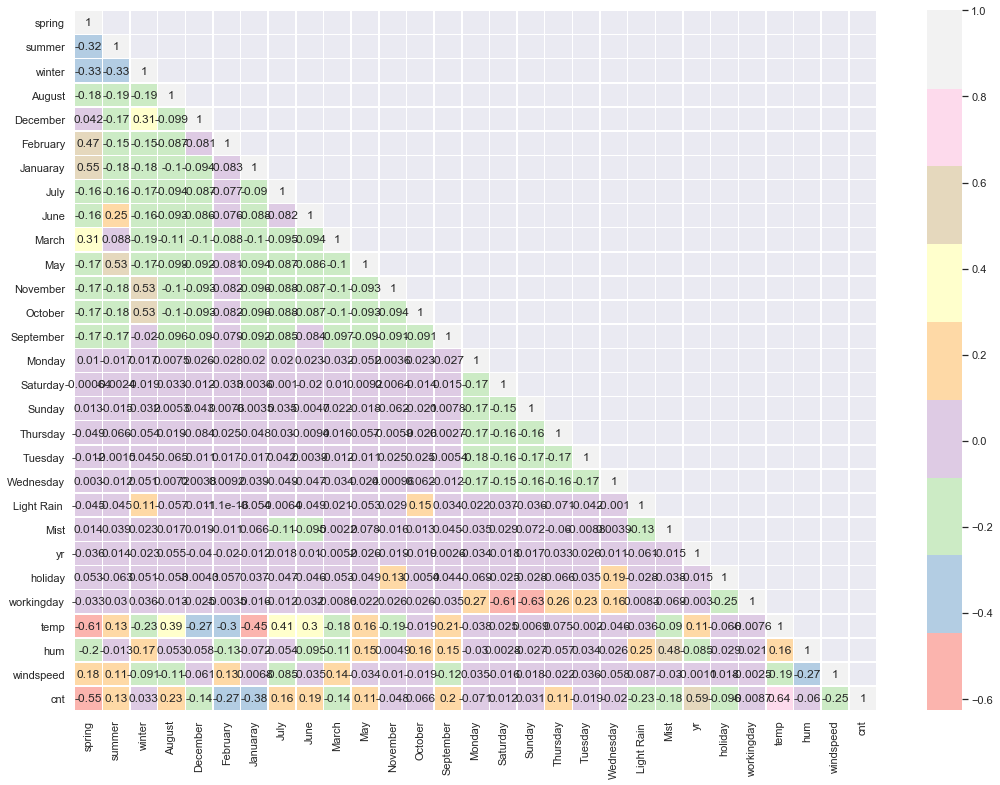

In [34]:
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
cor_mat= df_train[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df_train.corr(), annot = True, cmap ='Pastel1',linewidths=.5,mask=mask)

ax = plt.axes()

In [35]:
corr = df_train.corr()
corr_train= corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_train = corr_train.unstack().reset_index().dropna(subset = [0])
corr_train.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_train['Corr_abs'] = abs(corr_train['Correlation_Value'])
corr_train.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_train.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
837,cnt,temp,0.643517,0.643517
712,workingday,Sunday,-0.626783,0.626783
725,temp,spring,-0.605988,0.605988
711,workingday,Saturday,-0.605864,0.605864
834,cnt,yr,0.591508,0.591508
812,cnt,spring,-0.548871,0.548871
174,Januaray,spring,0.548861,0.548861
350,October,winter,0.533619,0.533619
321,November,winter,0.533619,0.533619
291,May,summer,0.532539,0.532539


### Dividing into X and Y sets for the model building

In [36]:
#Dividing into X and Y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

***with this model we will be doing Automated approach with selecting with top 20 features and then we will be eliminating variables untill we dont get prefered p-values less than 0.05 and Vif less than of 5.***

In [37]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 4),
 ('December', True, 1),
 ('February', True, 1),
 ('Januaray', True, 1),
 ('July', True, 1),
 ('June', False, 8),
 ('March', False, 9),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 6),
 ('September', True, 1),
 ('Monday', False, 3),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 7),
 ('Tuesday', False, 2),
 ('Wednesday', False, 5),
 ('Light Rain ', True, 1),
 ('Mist', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['spring', 'summer', 'winter', 'December', 'February', 'Januaray',
       'July', 'May', 'November', 'September', 'Saturday', 'Sunday',
       'Light Rain ', 'Mist', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['August', 'June', 'March', 'October', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [42]:
#Model 1

# Creating X_test dataframe with RFE selected variables
X_train_lm = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_lm)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          9.48e-186
Time:                        09:52:37   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3935      0.081      4.850      

In [43]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_vif = X_train[col]
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,workingday,48.84
18,hum,38.65
17,temp,29.21
11,Sunday,9.80
10,Saturday,9.41
0,spring,7.09
19,windspeed,5.47
2,winter,4.92
1,summer,4.30
5,Januaray,2.55


In [45]:
#Model 2

# Dropping highly correlated variables and insignificant variables

X = X_train_vif.drop('Sunday', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.4
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          8.77e-187
Time:                        09:52:38   Log-Likelihood:                 519.63
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     490   BIC:                            -914.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3585      0.038      9.322      

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,hum,32.83
16,temp,19.21
15,workingday,6.00
0,spring,5.59
18,windspeed,4.87
2,winter,4.14
1,summer,3.42
5,Januaray,2.39
12,Mist,2.38
13,yr,2.10


In [47]:
#Model 3

# Dropping highly correlated variables and insignificant variables

X = X_train_vif.drop(['Sunday','hum'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     146.5
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          3.42e-184
Time:                        09:52:38   Log-Likelihood:                 510.76
No. Observations:                 510   AIC:                            -983.5
Df Residuals:                     491   BIC:                            -903.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2863      0.035      8.204      

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,temp,7.66
15,workingday,5.78
17,windspeed,4.79
0,spring,4.64
2,winter,3.20
1,summer,2.97
5,Januaray,2.25
13,yr,2.09
4,February,1.89
10,Saturday,1.86


In [49]:
#Model 4

# Dropping highly correlated variables and insignificant variables

X = X_train_vif.drop(['Sunday','hum','Saturday'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     155.4
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          3.00e-185
Time:                        09:52:38   Log-Likelihood:                 510.65
No. Observations:                 510   AIC:                            -985.3
Df Residuals:                     492   BIC:                            -909.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2829      0.034      8.298      

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,temp,6.32
16,windspeed,4.79
0,spring,4.46
14,workingday,3.60
2,winter,3.11
1,summer,2.88
5,Januaray,2.23
12,yr,2.09
4,February,1.89
8,November,1.83


In [51]:
#Model 5

# Dropping highly correlated variables and insignificant variables

X = X_train_vif.drop(['Sunday','hum','Saturday','May'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          3.40e-186
Time:                        09:52:38   Log-Likelihood:                 510.24
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     493   BIC:                            -914.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2778      0.034      8.270      

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,temp,6.20
15,windspeed,4.69
0,spring,4.45
13,workingday,3.59
2,winter,3.11
1,summer,2.31
5,Januaray,2.23
11,yr,2.08
4,February,1.89
7,November,1.83


In [53]:
#Model 6

# Dropping highly correlated variables and insignificant variables

X = X_train_vif.drop(['Sunday','hum','Saturday','May','windspeed'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          9.01e-179
Time:                        09:52:39   Log-Likelihood:                 489.80
No. Observations:                 510   AIC:                            -947.6
Df Residuals:                     494   BIC:                            -879.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2134      0.033      6.403      

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,temp,5.43
0,spring,3.79
13,workingday,3.58
2,winter,2.99
5,Januaray,2.23
11,yr,2.07
1,summer,2.04
4,February,1.89
7,November,1.81
6,July,1.60


In [55]:
#Model 7

# Dropping highly correlated variables and insignificant variables

X = X_train_vif.drop(['Sunday','hum','Saturday','May','February','windspeed'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          1.87e-179
Time:                        09:52:39   Log-Likelihood:                 488.74
No. Observations:                 510   AIC:                            -947.5
Df Residuals:                     495   BIC:                            -884.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2027      0.033      6.234      

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,temp,5.36
12,workingday,3.56
2,winter,2.95
0,spring,2.36
10,yr,2.07
1,summer,2.04
6,November,1.79
4,Januaray,1.66
5,July,1.59
9,Mist,1.56


In [57]:
#Model 8

# Dropping highly correlated variables and insignificant variables

X = X_train_vif.drop(['Sunday','hum','Saturday','May','February','windspeed','summer'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     183.7
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          4.86e-180
Time:                        09:52:39   Log-Likelihood:                 487.42
No. Observations:                 510   AIC:                            -946.8
Df Residuals:                     496   BIC:                            -887.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2370      0.025      9.649      

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,4.62
11,workingday,3.37
1,winter,2.58
0,spring,2.07
9,yr,2.06
5,November,1.79
3,Januaray,1.66
8,Mist,1.52
2,December,1.46
4,July,1.35


In [59]:
#Model 9

# Dropping highly correlated variables and insignificant variables

X = X_train_vif.drop(['Sunday','hum','Saturday','May','February','windspeed','summer','Januaray'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          2.71e-180
Time:                        09:52:39   Log-Likelihood:                 485.27
No. Observations:                 510   AIC:                            -944.5
Df Residuals:                     497   BIC:                            -889.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2254      0.024      9.400      

In [60]:
#Model 10

# Dropping highly correlated variables and insignificant variables

X = X_train_vif.drop(['Sunday','hum','Saturday','May','February','windspeed','summer','Januaray','December'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.9
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          1.12e-180
Time:                        09:52:39   Log-Likelihood:                 483.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     498   BIC:                            -892.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2159      0.024      9.178      

In [61]:
#Model 11

# Dropping highly correlated variables and insignificant variables

X = X_train_vif.drop(['Sunday','hum','Saturday','May','February','windspeed','summer','Januaray','December','November'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          2.97e-181
Time:                        09:52:40   Log-Likelihood:                 481.92
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     499   BIC:                            -895.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2114      0.023      9.028      

In [62]:
#Model 12

# Dropping highly correlated variables and insignificant variables

X = X_train_vif.drop(['Sunday','hum','Saturday','May','February','windspeed','summer','Januaray','December','November','workingday'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          2.16e-181
Time:                        09:52:40   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1938      0.022      8.750      

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,2.99
6,yr,2.05
5,Mist,1.51
1,winter,1.33
2,July,1.33
0,spring,1.25
3,September,1.19
4,Light Rain,1.06
7,holiday,1.04


***Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.***

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [64]:

y_train_cnt = lr_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

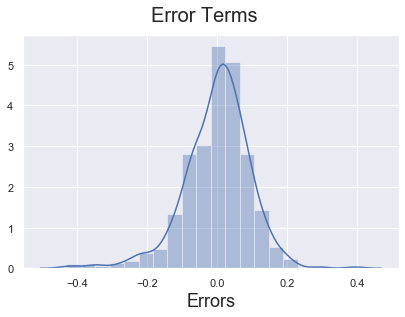

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Making Predictions

#### Applying the scaling on the test sets

In [66]:
#Making Predictions Using the Final Model
#Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions 
#using the final

# Apply scaler() to all the columns except the 'Binary' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,spring,summer,winter,August,December,February,Januaray,July,June,March,...,Wednesday,Light Rain,Mist,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.155251,0.027397,0.319635,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.362974,0.163612,0.467403,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [67]:
#Dividing into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [68]:
# Creating X_test_lm dataframe by dropping variables from X_test_m4

X_test_lm = X_test[col]
X_test_lm.shape

(219, 20)

In [69]:
X_test_lm = X_test_lm.drop(['Sunday','hum','Saturday','May','February','windspeed','summer','Januaray','December','November','workingday'], axis = 1)
X_test_lm.head()

,spring,winter,July,September,Light Rain,Mist,yr,holiday,temp
184,0,0,1,0,0,1,0,1,0.831783
535,0,0,0,0,0,0,1,0,0.901354
299,0,1,0,0,0,1,0,0,0.511964
221,0,0,0,0,0,0,0,0,0.881625
152,0,0,0,0,0,0,0,0,0.817246


In [70]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test_lm)

In [71]:
# Making predictions using the fourth model

y_pred_lm = lr_2.predict(X_test_lm)

In [72]:
y_pred_lm.head()

184    0.336295
535    0.851568
299    0.411274
221    0.609235
152    0.578901
dtype: float64

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [74]:
#Looking at the RMSE

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred_lm))

0.09519057896166846

In [75]:
#Checking the R-squared on the test set

r_squared = r2_score(y_test, y_pred_lm)
r_squared

0.8092200832884748

## Model Evaluation

Text(0, 0.5, 'y_pred')

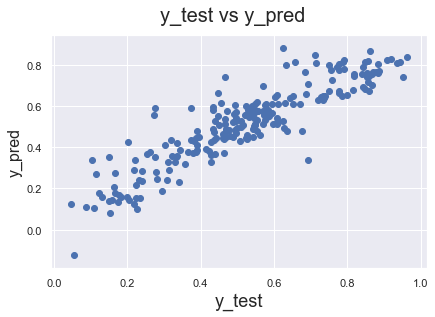

In [76]:
#Model Evaluation

# Plotting y_test and y_pred=lm to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

Here the end of the linear regression with model evaluation.
The significant varaibles which affect the output are the varaibles that have higher values of coefficient in the 
final model of the summery i.e. in model 12.

We can see that the equation of our best fitted line is:

$ count = 0.47  \times  temp + 0.203  \times  yr + 0.055 \times winter - 0.110 \times spring - 0.067 \times July + 0.065 \times september - 0.30 \times Light Rain - 0.080 \times Mist - 0.1011 \times holiday $

we have got R-squared and adj R-squared for train data
R-squared:                       0.823
Adj. R-squared:                  0.819

and for test data
R-squared:                      0.809